# Midterm EDA

Erik Strand <br>
17 March 2021

## Project Overview

My project will look at inclusionary housing development in several U.S. cities - at this point, I am focusing on New York City and Chicago, with the possiblity to later add more cities as datapoints. For each city, I am analyzing data on affordable housing developed through inclusionary housing policies since 2015. Using this data, I will be answering two research questions. 

1. How do inclusionary housing policies with different requirements influence affordable and total residential development outputs compared to expected levels? 
2. Where are affordable housing units built through inclusionary housing policies located within cities? What neighborhood/social indicators (eg. race, class, median income, etc.) are over- or under-represented in actual affordable housing output compared to expected levels? 

At this stage, I am not directly answering these questions yet or implementing ML techniques. This notebook focuses on cleaning and aggregating data and performing EDA. 

In [46]:
# Load modules

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [38]:
# Read in NYC IH housing data 2015-present, provided by HPD & aggregated by zip code
nyc_ih = gpd.read_file("../data/final project/CLEAN_DATA/nyc")

nyc_ih.head()

,zip,perc_aff,ami,eli,vli,li,mod,mid,other,aff_units,geometry
0,10001,25.0,60.0,0.0,188.0,188.0,92.0,0.0,0.0,468.0,"POLYGON ((987646.000 210360.000, 987522.000 21..."
1,10001,30.0,80.0,0.0,0.0,878.0,0.0,16.0,0.0,894.0,"POLYGON ((987646.000 210360.000, 987522.000 21..."
2,10002,25.0,60.0,0.0,148.0,0.0,40.0,0.0,0.0,188.0,"POLYGON ((985342.000 197658.000, 985336.000 19..."
3,10002,30.0,80.0,0.0,32.0,646.0,0.0,10.0,0.0,688.0,"POLYGON ((985342.000 197658.000, 985336.000 19..."
4,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"POLYGON ((987412.000 202684.000, 987400.000 20..."


In [32]:
# Read in Chicago IH data 2015-present, provided by Chicago Department of Housing & aggregated by zip code
chicago_ih = gpd.read_file("../data/final project/CLEAN_DATA/chicago")

chicago_ih.head()

,zip,on_st_n,off_st_,aff_nts,perc_ff,ami,geometry
0,60647,80.0,5.0,85.0,10.0,60.0,"POLYGON ((1162710.570 1913303.050, 1162715.690..."
1,60639,NaN,NaN,0.0,10.0,60.0,"POLYGON ((1149304.490 1914985.850, 1149278.070..."
2,60707,14.0,0.0,14.0,10.0,60.0,"POLYGON ((1133505.410 1909960.430, 1133421.760..."
3,60622,52.0,5.0,57.0,10.0,60.0,"POLYGON ((1165664.482 1902791.860, 1165664.480..."
4,60651,NaN,NaN,0.0,10.0,60.0,"POLYGON ((1154894.670 1905152.880, 1154849.960..."


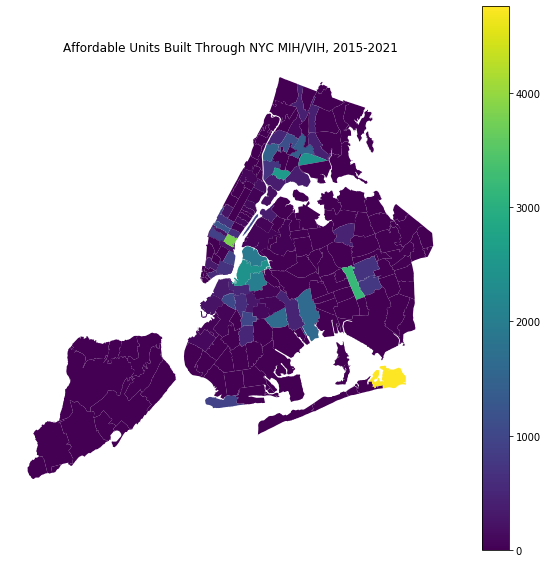

In [19]:
ax = nyc_ih.plot(column='aff_units', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Affordable Units Built Through NYC MIH/VIH, 2015-2021")
plt.axis(False)
plt.show()

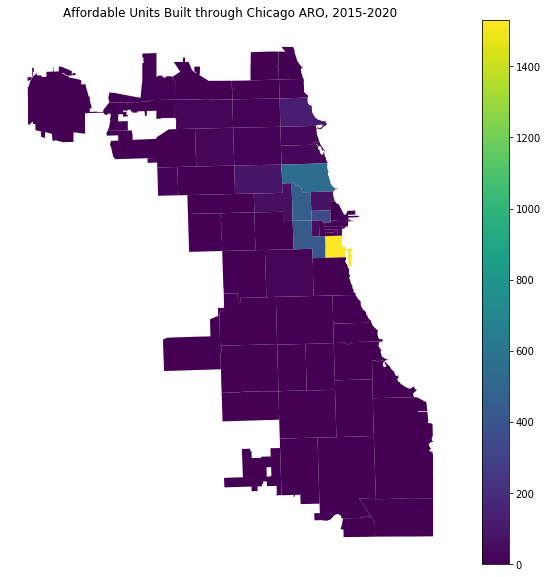

In [33]:
ax = chicago_ih.plot(column='aff_nts', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Affordable Units Built through Chicago ARO, 2015-2020")
plt.axis(False)
plt.show()

In [23]:
chi_housing = pd.read_csv("../data/final project/CLEAN_DATA/chi_housing.csv")

chi_housing.head()

,zip,rental_all,rental_2014plus
0,60601,5959,763
1,60602,345,214
2,60603,236,0
3,60604,356,17
4,60605,7636,869


In [24]:
nyc_housing = pd.read_csv("../data/final project/CLEAN_DATA/nyc_housing.csv")

nyc_housing.head()

,zip,rental_all,rental_2014plus
0,10001,9712,1229
1,10002,28933,92
2,10003,17598,98
3,10004,1104,0
4,10005,3444,4


In [25]:
chi_social = pd.read_csv("../data/final project/CLEAN_DATA/chi_si.csv")

chi_social.head()

,zip,med_hh_inc,pop,med_age,youth_pop,youth_perc,elderly_pop,elderly_perc,white_pop,white_perc,...,pacisl_perc,other_race_pop,other_race_perc,multiracial_pop,multiracial_perc,latinx_pop,latinx_perc,citizen_pop,citizen_perc,housing_total
0,60601,173494,15083,33,880,0.058344,2109,0.139826,11004,0.729563,...,0.0,104,0.006895,423,0.028045,1224,0.081151,10789,0.715309,10748
1,60602,250000,1145,34,149,0.130131,6,0.005240,734,0.641048,...,0.0,0,0.000000,41,0.035808,74,0.064629,883,0.771179,714
2,60603,250000,1052,31,16,0.015209,120,0.114068,661,0.628327,...,0.0,0,0.000000,13,0.012357,34,0.032319,828,0.787072,810
3,60604,195625,823,32,36,0.043742,72,0.087485,532,0.646416,...,0.0,0,0.000000,10,0.012151,28,0.034022,660,0.801944,578
4,60605,169920,29060,33,2411,0.082966,2923,0.100585,18370,0.632140,...,0.0,528,0.018169,1248,0.042946,2185,0.075189,23691,0.815244,16684


In [26]:
nyc_social = pd.read_csv("../data/final project/CLEAN_DATA/nyc_si.csv")

nyc_social.head()

,zip,med_hh_inc,pop,med_age,youth_pop,youth_perc,elderly_pop,elderly_perc,white_pop,white_perc,...,pacisl_perc,other_race_pop,other_race_perc,multiracial_pop,multiracial_perc,latinx_pop,latinx_perc,citizen_pop,citizen_perc,housing_total
0,10001,122776,24117,36,2101,0.087117,3490,0.144711,15677,0.650039,...,0.000871,799,0.033130,717,0.029730,3741,0.155119,18676,0.774392,14746
1,10002,40045,74479,44,9477,0.127244,16931,0.227326,23849,0.320211,...,0.000295,8924,0.119819,3127,0.041985,19554,0.262544,53646,0.720284,35921
2,10003,183787,53977,32,3374,0.062508,7215,0.133668,40681,0.753673,...,0.001352,1155,0.021398,1168,0.021639,4559,0.084462,44096,0.816941,30931
3,10004,205202,3335,37,382,0.114543,201,0.060270,2033,0.609595,...,0.005097,35,0.010495,116,0.034783,108,0.032384,2537,0.760720,2264
4,10005,241094,8701,30,1037,0.119182,93,0.010688,6532,0.750718,...,0.000000,217,0.024940,315,0.036203,552,0.063441,6542,0.751868,5889


In [43]:
chicago = pd.merge(chicago_ih, chi_housing, on = "zip")
chicago = pd.merge(chicago, chi_social, on = "zip")

chicago["aff_dev_rate"] = chicago["aff_nts"] / chicago["pop"]
chicago["tot_dev_rate"] = chicago["rental_2014plus"] / chicago["pop"]

chicago.head()

,zip,on_st_n,off_st_,aff_nts,perc_ff,ami,geometry,rental_all,rental_2014plus,med_hh_inc,...,other_race_perc,multiracial_pop,multiracial_perc,latinx_pop,latinx_perc,citizen_pop,citizen_perc,housing_total,aff_dev_rate,tot_dev_rate
0,60647,80.0,5.0,85.0,10.0,60.0,"POLYGON ((1162710.570 1913303.050, 1162715.690...",21919,440,88699,...,0.085847,3475,0.039654,37622,0.429313,62546,0.713727,39159,0.000970,0.005021
1,60639,NaN,NaN,0.0,10.0,60.0,"POLYGON ((1149304.490 1914985.850, 1149278.070...",13273,28,51000,...,0.353272,2264,0.025668,68792,0.779919,47185,0.534953,28659,0.000000,0.000317
2,60707,14.0,0.0,14.0,10.0,60.0,"POLYGON ((1133505.410 1909960.430, 1133421.760...",5126,124,82969,...,0.135869,1301,0.030191,16862,0.391293,29764,0.690692,16680,0.000325,0.002877
3,60707,14.0,0.0,14.0,10.0,60.0,"POLYGON ((1127563.350 1919165.960, 1127500.000...",5126,124,82969,...,0.135869,1301,0.030191,16862,0.391293,29764,0.690692,16680,0.000325,0.002877
4,60622,52.0,5.0,57.0,10.0,60.0,"POLYGON ((1165664.482 1902791.860, 1165664.480...",14847,166,129391,...,0.050625,1748,0.032799,12207,0.229050,42268,0.793110,26174,0.001070,0.003115


In [49]:
nyc = pd.merge(nyc_ih, nyc_housing, on = "zip")
nyc = pd.merge(nyc, nyc_social, on = "zip")

nyc["aff_dev_rate"] = nyc["aff_units"] / nyc["pop"]
nyc["tot_dev_rate"] = nyc["rental_2014plus"] / nyc["pop"]

nyc.head()

,zip,perc_aff,ami,eli,vli,li,mod,mid,other,aff_units,...,other_race_perc,multiracial_pop,multiracial_perc,latinx_pop,latinx_perc,citizen_pop,citizen_perc,housing_total,aff_dev_rate,tot_dev_rate
0,10001,25.0,60.0,0.0,188.0,188.0,92.0,0.0,0.0,468.0,...,0.033130,717,0.029730,3741,0.155119,18676,0.774392,14746,0.019405,0.050960
1,10001,30.0,80.0,0.0,0.0,878.0,0.0,16.0,0.0,894.0,...,0.033130,717,0.029730,3741,0.155119,18676,0.774392,14746,0.037069,0.050960
2,10002,25.0,60.0,0.0,148.0,0.0,40.0,0.0,0.0,188.0,...,0.119819,3127,0.041985,19554,0.262544,53646,0.720284,35921,0.002524,0.001235
3,10002,30.0,80.0,0.0,32.0,646.0,0.0,10.0,0.0,688.0,...,0.119819,3127,0.041985,19554,0.262544,53646,0.720284,35921,0.009238,0.001235
4,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.021398,1168,0.021639,4559,0.084462,44096,0.816941,30931,0.000000,0.001816


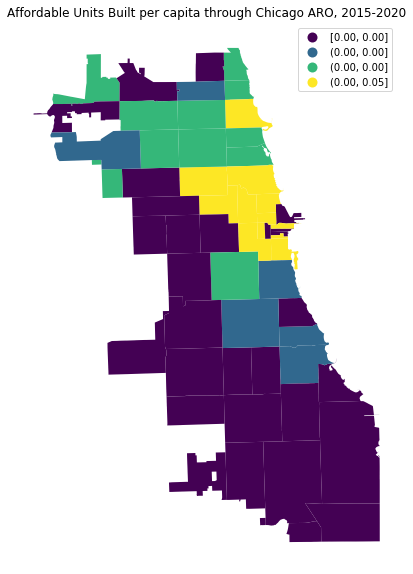

In [47]:
ax = chicago.plot(column='aff_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Affordable Units Built per capita through Chicago ARO, 2015-2020")
plt.axis(False)
plt.show()

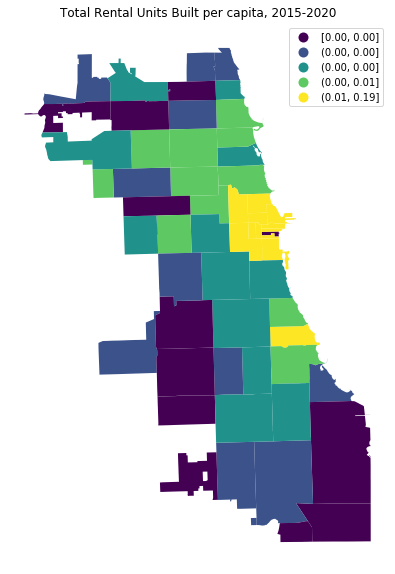

In [50]:
ax = chicago.plot(column='tot_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Total Rental Units Built per capita, 2015-2020")
plt.axis(False)
plt.show()

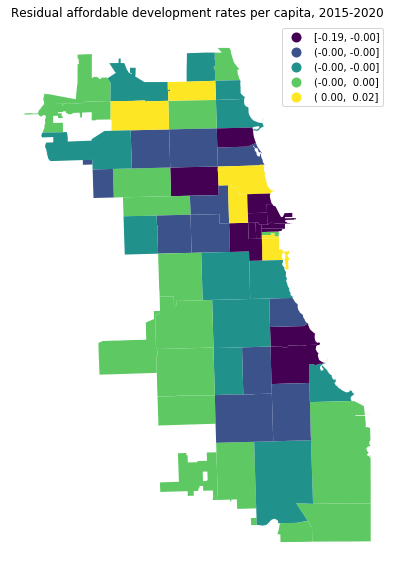

In [68]:
chicago["dev_residual"] = chicago["aff_dev_rate"] - chicago["tot_dev_rate"]

ax = chicago.plot(column='dev_residual', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Residual affordable development rates per capita, 2015-2020")
plt.axis(False)
plt.show()

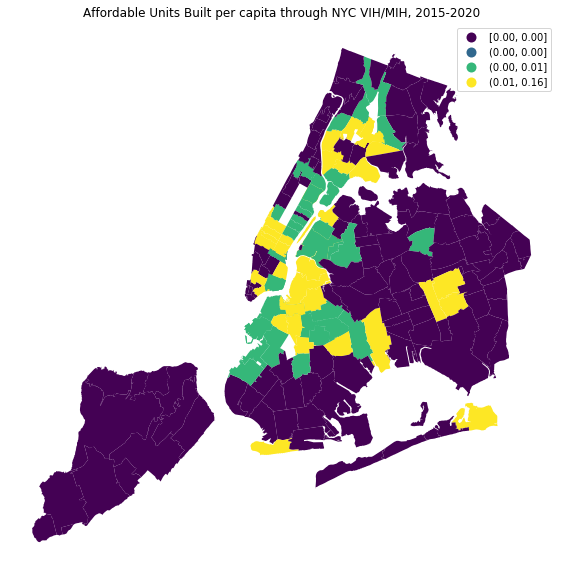

In [51]:
ax = nyc.plot(column='aff_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Affordable Units Built per capita through NYC VIH/MIH, 2015-2020")
plt.axis(False)
plt.show()

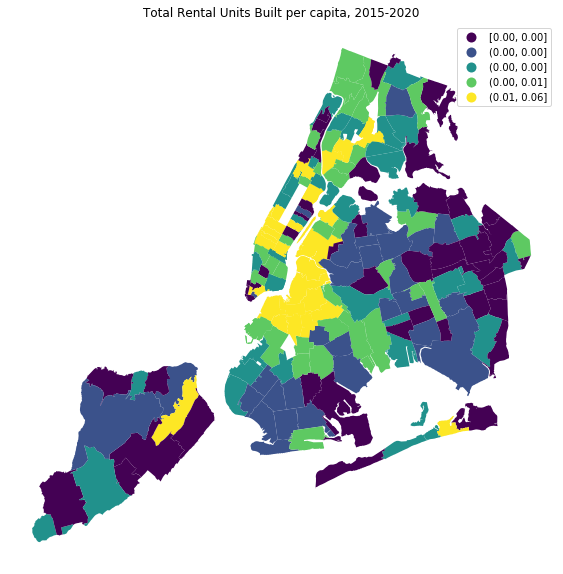

In [52]:
ax = nyc.plot(column='tot_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Total Rental Units Built per capita, 2015-2020")
plt.axis(False)
plt.show()

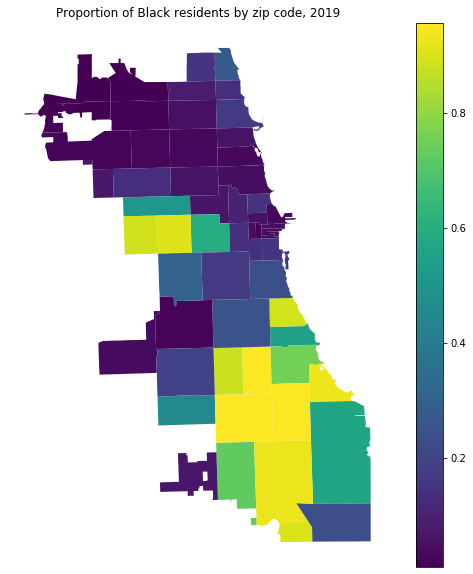

In [55]:
ax = chicago.plot(column='black_perc', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Proportion of Black residents by zip code, 2019")
plt.axis(False)
plt.show()

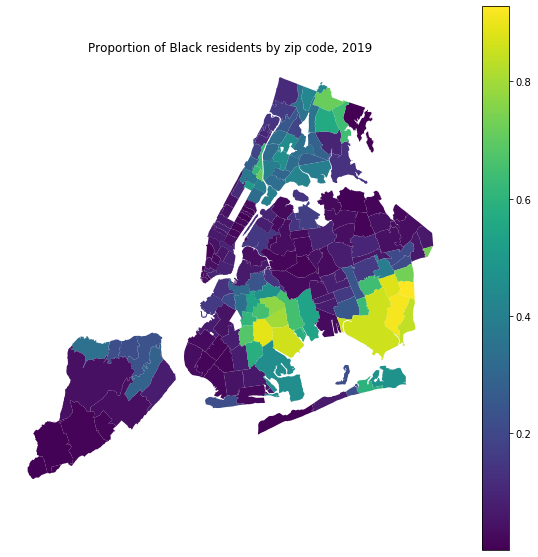

In [56]:
ax = nyc.plot(column='black_perc', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Proportion of Black residents by zip code, 2019")
plt.axis(False)
plt.show()

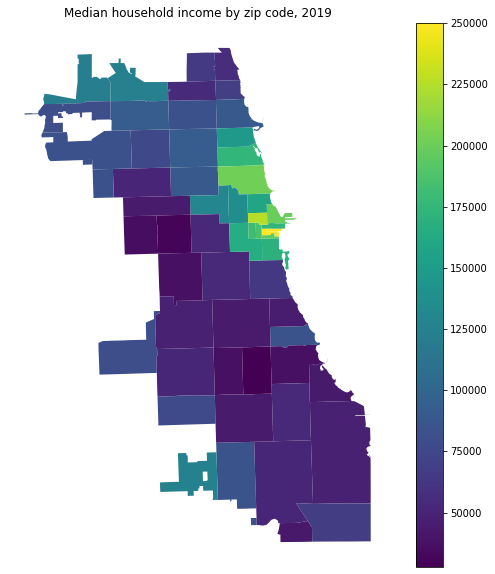

In [66]:
ax = chicago.plot(column='med_hh_inc', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Median household income by zip code, 2019")
plt.axis(False)
plt.show()

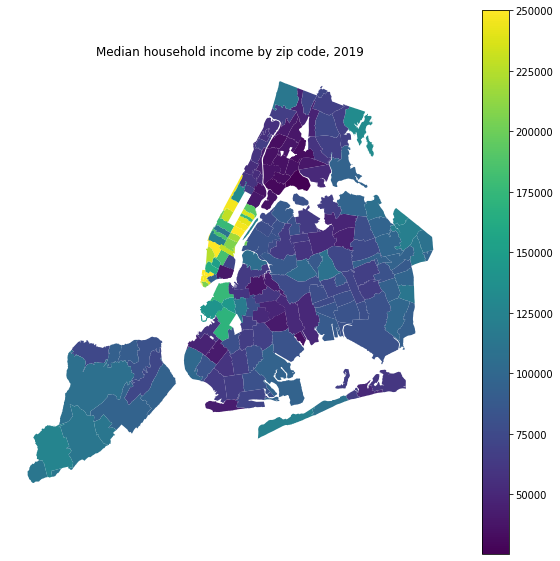

In [64]:
ax = nyc.plot(column='med_hh_inc', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Median household income by zip code, 2019")
plt.axis(False)
plt.show()

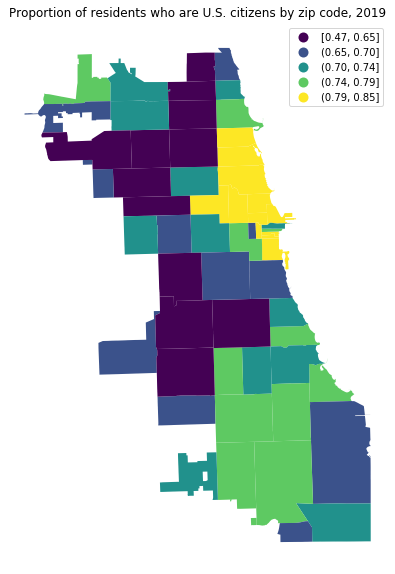

In [61]:
ax = chicago.plot(column='citizen_perc', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = "quantiles")
plt.title("Proportion of residents who are U.S. citizens by zip code, 2019")
plt.axis(False)
plt.show()

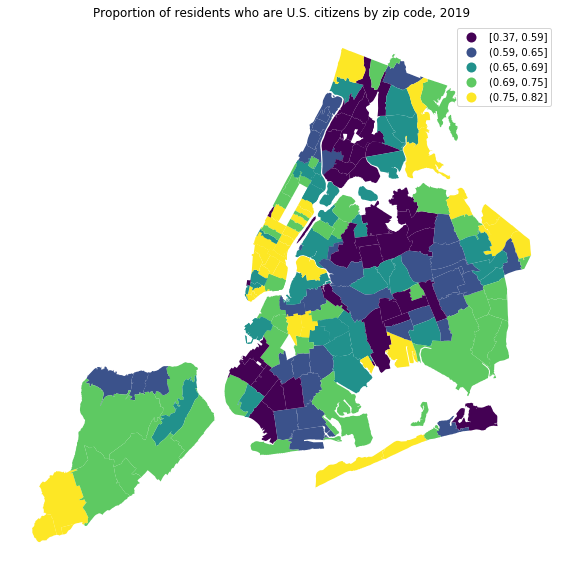

In [65]:
ax = nyc.plot(column='citizen_perc', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = "quantiles")
plt.title("Proportion of residents who are U.S. citizens by zip code, 2019")
plt.axis(False)
plt.show()